In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from skopt import gp_minimize
from skopt.plots import plot_convergence

In [2]:
df = pd.read_csv("data/toy.csv")
df.head()

,TimeStamp,val0,val1,val2,val3
0,2017-10-08 18:34:33,8.851202,7.337829,9.178729,2.753579
1,2017-10-08 18:39:33,-2.811906,-2.354353,-2.696581,-1.684245
2,2017-10-08 18:44:33,0.177684,-0.306140,0.178236,-0.185883
3,2017-10-08 18:49:33,10.541667,10.326570,12.918785,5.212464
4,2017-10-08 18:54:33,-1.329070,-2.633356,-1.971755,1.635031


In [26]:
dat =np.array( df["val0"]).reshape(-1,1)

In [182]:
def oneClass(nu,gamma):
    clf = svm.OneClassSVM(nu=nu,kernel="rbf",gamma=gamma)
    clf.fit(dat)    
    ret = clf.predict(dat)
    return ret

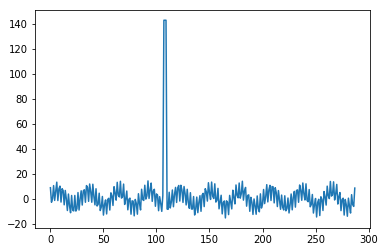

In [183]:
plt.plot(dat)

In [184]:
def func(params):
    nu, gamma =params
    target_ratio = 0.0001
    ret = oneClass(nu,gamma)
    anomalies = len(np.where(ret == -1))
    ratio = float(anomalies) / len(ret)
    #print(ratio)
    residual = abs(target_ratio - ratio)
    return ratio

In [185]:
dimensions  = [(0.01, 0.05),   
(0.00001,0.0005)] 

In [186]:
res_gp = gp_minimize(func, dimensions, n_calls=30, random_state=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [187]:
func_return = oneClass(res_gp.x[0], res_gp.x[1])

In [188]:
res_gp.x[0], res_gp.x[1]

(0.03371378472900074, 0.0004236902168046986)

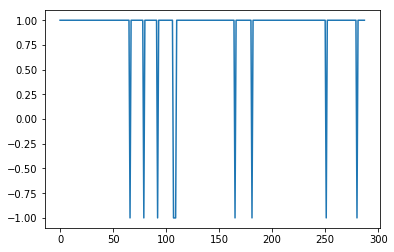

In [189]:
plt.plot(func_return)

In [190]:
anom_point = np.where(func_return == -1)

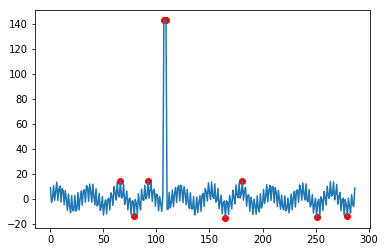

In [191]:
plt.scatter(anom_point, dat[anom_point], c="red")
plt.plot(dat)